In [2]:
import sys
from io import StringIO

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report


In [3]:
# 1) Load the MNIST data set from OpenML ------------------------------
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(str)

# 2) Keep only the digits 3 and 8 ------------------------------------
mask = np.isin(y, ["3", "8"])
X, y = X[mask], y[mask]

# 3) Convert labels to 0 / 1  (e.g. 3→0, 8→1) ------------------------
y_bin = (y == "8").astype(int)

# 4) Simple feature scaling  (pixels ∈ [0,255] → [0,1]) --------------
X = X.astype(np.float32) / 255.0

n_obs = 13966
n_train = 11000
n_test = n_obs - n_train

# 5) Re-create the original MNIST train/test split -------------------
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y_bin[:n_train], y_bin[n_train:]


In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11000, 784), (11000,), (2966, 784), (2966,))

In [5]:
def viz(X, n):
    plt.imshow(X[n].reshape(28, 28))
    return

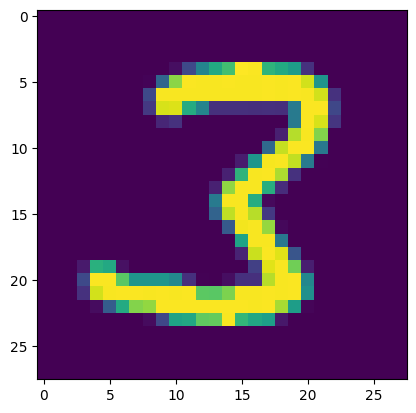

In [6]:
viz(X_train, 634)

In [12]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

In [13]:
# 6) Build the SGDClassifier with the required hyper-parameters -------
clf = SGDClassifier(
    loss="log_loss",  # logistic regression
    penalty="l2",  # L2 regulariser
    alpha=1.0,  # μ = 1   (regularisation weight)
    learning_rate="constant",
    eta0=0.001,  # γ = 0.001  (constant step size)
    max_iter=100,
    shuffle=True,
    tol=1e-6,  # stop when optimisation converges
    random_state=3317,
    verbose=1,
)

# 7) Train ------------------------------------------------------------
clf.fit(X_train, y_train)


SGDClassifier(alpha=1.0, eta0=0.001, learning_rate='constant', loss='log_loss',
              max_iter=100, random_state=3317, tol=1e-06, verbose=1)

In [14]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()

loss_list = []
for line in loss_history.split("\n"):
    if len(line.split("loss: ")) == 1:
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

len(loss_list)

14

In [15]:
loss_list

[0.423375,
 0.41172,
 0.41162,
 0.41135,
 0.410613,
 0.410728,
 0.410577,
 0.410717,
 0.410152,
 0.410918,
 0.410262,
 0.410593,
 0.410406,
 0.410548]

In [10]:
X_train.shape

(11000, 784)

In [ ]:
# 8) Evaluate ---------------------------------------------------------
y_pred = clf.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["digit 3", "digit 8"]))

Test accuracy: 0.9366149696561025
              precision    recall  f1-score   support

     digit 3       0.95      0.93      0.94      1506
     digit 8       0.93      0.95      0.94      1460

    accuracy                           0.94      2966
   macro avg       0.94      0.94      0.94      2966
weighted avg       0.94      0.94      0.94      2966

